# Forecasting

## Predicting Customer Demand

Imagine that you’re running a car dealership in Quebec, Canada. You are using a
standard business model for retail: you buy cars from a manufacturer at a low
price and then sell those cars to individual customers at higher prices. Every
month, you need to decide how many cars you’ll order from the manufacturer. If
you order too many cars, you’ll be unable to sell them all quickly, resulting in
high storage costs or cash flow problems. If you order too few cars, you won’t be able to meet your customers’ demands.

Ordering the right number of cars is important. But what is the right number?

The answer depends on certain business considerations, such as the cash in your
bank account and how much you want to grow—but in a typical month, the right
number of cars to order is exactly the number of cars that customers will want to buy during the coming month. Since we can’t see into the future, we need to
forecast the demand and place an order based on our forecast. We can choose from several proven quantitative methods to obtain a forecast of next month’s demand. One of the best methods is linear regression.

## Cleaning Erroneous Data

The data we’ll analyze to forecast the future is a record of the number of cars
sold by dealerships in Quebec, Canada, for each of 108 consecutive months.

This data is old; the most recent month recorded is December 1968.
Therefore, for this scenario, we’ll be imagining that we live in December 1968,
and we’ll make forecasts for January 1969. The forecasting principles we’ll
discuss will be evergreen, so if you can use data from 1968 to forecast results in 1969, you’ll be able to use data from year n to forecast results from year n + 1, for n = 2,023 or 3,023 or any other number.

In [44]:
import pandas as pd

carsales = pd.read_csv('carsales.csv')

In [45]:
carsales.head()

,Month,Monthly car sales in Quebec 1960-1968
0,1960-01,6550.0
1,1960-02,8728.0
2,1960-03,12026.0
3,1960-04,14395.0
4,1960-05,14587.0


The column names in this dataset are Month and Monthly car sales in Quebec 1960-1968. The second column name will be easier to work with if we shorten it.

In [46]:
carsales.columns = ['month', 'sales']

In [47]:
carsales.tail()

,month,sales
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0
108,Monthly car sales in Quebec 1960-1968,NaN


In [48]:
# Remove the last row
carsales = carsales.loc[0:107, :].copy()
carsales.tail()

,month,sales
103,1968-08,16722.0
104,1968-09,14385.0
105,1968-10,21342.0
106,1968-11,17180.0
107,1968-12,14577.0


The simplest way to address the issues with the data type of our date data is to define a new variable called period. We can define it as follows:

In [49]:
carsales['period'] = list(range(108))

carsales.head()

,month,sales,period
0,1960-01,6550.0,0
1,1960-02,8728.0,1
2,1960-03,12026.0,2
3,1960-04,14395.0,3
4,1960-05,14587.0,4


These simple tasks, like adding a numeric column for months, removing an
extra row, and changing column names, are part of data cleaning.

## Plotting Data to Find Trends

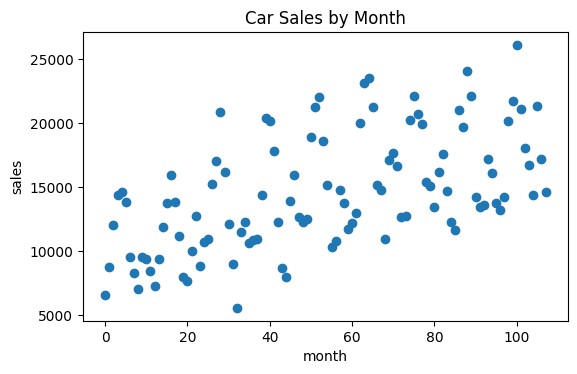

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6.25, 3.75))
plt.scatter(carsales['period'], carsales['sales'])
plt.xlabel('month')
plt.ylabel('sales')
plt.title('Car Sales by Month')
plt.show()

## Performing Linear Regression

The regression line shows us that the data has a general trend upward over time, and if we measure the regression line carefully, we can find exactly the slope and height of that trend.


We’ll use methods for linear regression that are very particular about the
shape of the data we use, meaning whether sales numbers are stored as 108 rows
× 1 column or 108 columns × 1 row. In this case, our linear regression code will
run more smoothly if our data is stored as 108 rows of 1 list each, where each list contains one number. To get our data in this shape, we’ll use the pandas
reshape() method as follows:

In [51]:
carsales['period'].values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107])

In [52]:
carsales['period'].values.reshape(-1,1)

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [53]:
x = carsales['period'].values.reshape(-1,1)
y = carsales['sales'].values.reshape(-1,1)

- new shape of the data: 108 rows of one-element lists.

In [54]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x , y)

LinearRegression()

A regressor, as its name tautologically suggests, is a Python object that we’ll use to perform regression.

After creating the regressor, we tell it to fit our x and y variables. We are telling it to calculate the line that fits the data by matching its location and general trend.


A more quantitative way to describe what fitting our regression means is that
it’s determining precise, optimized values for two numbers: a coefficient and an
intercept. After running the preceding snippet, we can look at both of these
numbers as follows:


In [55]:
print(regressor.coef_)
print(regressor.intercept_)

[[81.20250174]]
[10250.77726809]


## Applying Algebra to the Regression Line

$y = m x + b$ , where m is the slope/coefficient and b is the intercept

The relationship between time period and car sales can be expressed, at least approximately, as follows:

$car sales = 81.2 *period + 10250.8$

The
interpretation of the line’s slope, 81.2, is the monthly growth trend of car sales.
Based on the data we’ve observed in the past, we conclude that car sales in
Quebec grow by about 81.2 cars per month. Randomness and other variation
remain, but a growth of 81.2 is what we approximately expect. The
interpretation of the intercept variable, 10,250.8, is the baseline value of car
sales: the expected car sales in month 0 after “removing” or ignoring the chaos
of seasonal variation, the passage of time, and other influences

Our regression, or equivalently
our model, tells us that we expect to sell about 10,250.8 cars at the beginning of
the time frame in our data, and we expect to sell about 81.2 more cars every
month than we sold in the previous month.


Plotting our regression line and our hypothesized line of $car sales = 125 * period+8000$

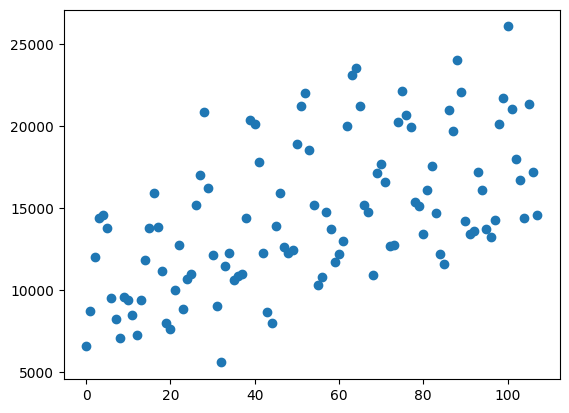

In [56]:
plt.scatter(carsales['period'], carsales['sales'])
plt.show()

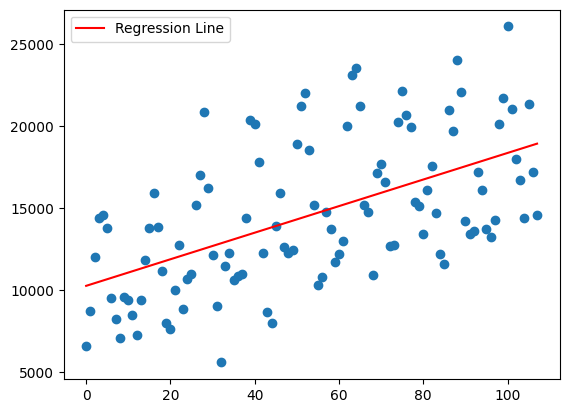

In [57]:
# With regression line
plt.scatter(carsales['period'], carsales['sales'])
plt.plot(carsales['period'], [81.2 * i +10250.8 for i in carsales['period']], 'r-', label='Regression Line')
plt.legend()
plt.show()

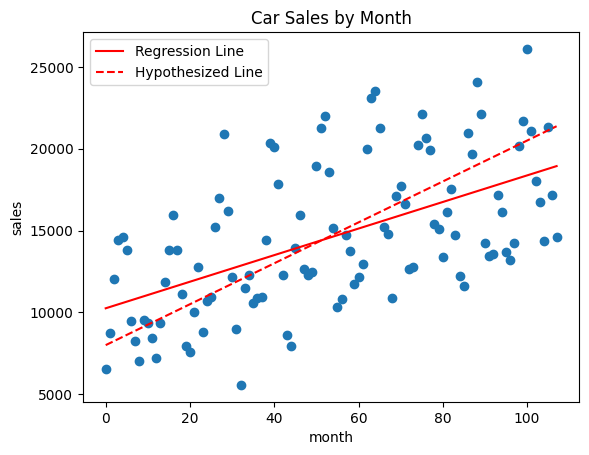

In [58]:
# With regression and hypothesized line
plt.scatter(carsales['period'], carsales['sales'])
plt.plot(carsales['period'], [81.2 * i + 10250.8 for i in carsales['period']], 'r-', label='Regression Line')
plt.plot(carsales['period'], [125 * i + 8000 for i in carsales['period']], 'r--', label='Hypothesized Line')
plt.legend(loc='upper left')
plt.title('Car Sales by Month')
plt.xlabel('month')
plt.ylabel('sales')
plt.show()


## Calculating Error Measurements

Regression Errors: vertical distances between points and a regression line

The regression line is not a perfect fit. The distance between a predicted and an actual value is called the regression's *error* relative to that point.

error -                 $e_i$

predicted value -       $\hat{y_i}$

actual value -          $y_i$

<center>$e_i = y_i - \hat{y_i}$</center>

- Calculating the error relative to each data point will give us a way to quantify how well any line fits our data. Lines with low errors fit the data well, and lineswith high errors fit the data poorly.

- Let’s calculate those error measurements for our car sales regression. We’ll
calculate each point of the lines we’re interested in and compare those points to each point of our dataset:

In [59]:
saleslist = carsales['sales']
print(saleslist)

0       6550.0
1       8728.0
2      12026.0
3      14395.0
4      14587.0
        ...   
103    16722.0
104    14385.0
105    21342.0
106    17180.0
107    14577.0
Name: sales, Length: 108, dtype: float64


In [60]:
saleslist = carsales['sales'].tolist()
print(saleslist)

[6550.0, 8728.0, 12026.0, 14395.0, 14587.0, 13791.0, 9498.0, 8251.0, 7049.0, 9545.0, 9364.0, 8456.0, 7237.0, 9374.0, 11837.0, 13784.0, 15926.0, 13821.0, 11143.0, 7975.0, 7610.0, 10015.0, 12759.0, 8816.0, 10677.0, 10947.0, 15200.0, 17010.0, 20900.0, 16205.0, 12143.0, 8997.0, 5568.0, 11474.0, 12256.0, 10583.0, 10862.0, 10965.0, 14405.0, 20379.0, 20128.0, 17816.0, 12268.0, 8642.0, 7962.0, 13932.0, 15936.0, 12628.0, 12267.0, 12470.0, 18944.0, 21259.0, 22015.0, 18581.0, 15175.0, 10306.0, 10792.0, 14752.0, 13754.0, 11738.0, 12181.0, 12965.0, 19990.0, 23125.0, 23541.0, 21247.0, 15189.0, 14767.0, 10895.0, 17130.0, 17697.0, 16611.0, 12674.0, 12760.0, 20249.0, 22135.0, 20677.0, 19933.0, 15388.0, 15113.0, 13401.0, 16135.0, 17562.0, 14720.0, 12225.0, 11608.0, 20985.0, 19692.0, 24081.0, 22114.0, 14220.0, 13434.0, 13598.0, 17187.0, 16119.0, 13713.0, 13210.0, 14251.0, 20139.0, 21725.0, 26099.0, 21084.0, 18024.0, 16722.0, 14385.0, 21342.0, 17180.0, 14577.0]


In [61]:
saleslist = carsales['sales'].tolist()
regressionline = [81.2 * i + 10250.8 for i in carsales['period']]
hypothesizedline = [125 * i + 8000 for i in carsales['period']]

error1 = [(x-y) for x, y in zip(regressionline, saleslist)]
print(error1)
'''
error1 = regressionline[0] - saleslist[0]
print(error1)
error1 = regressionline[1] - saleslist[1]
print(error1)
'''
error2 = [(x-y) for x, y in zip(hypothesizedline, saleslist)]
print(error2)

[3700.7999999999993, 1604.0, -1612.800000000001, -3900.6000000000004, -4011.4000000000015, -3134.2000000000007, 1240.0, 2568.199999999999, 3851.3999999999996, 1436.5999999999985, 1698.7999999999993, 2688.0, 3988.199999999999, 1932.3999999999996, -449.40000000000146, -2315.2000000000007, -4376.0, -2189.800000000001, 569.3999999999996, 3818.5999999999985, 4264.799999999999, 1941.0, -721.8000000000011, 3302.3999999999996, 1522.5999999999985, 1333.7999999999993, -2838.0, -4566.800000000001, -8375.6, -3599.4000000000015, 543.7999999999993, 3771.0, 7281.199999999999, 1456.3999999999996, 755.5999999999985, 2509.7999999999993, 2312.0, 2290.199999999999, -1068.6000000000004, -6961.4000000000015, -6629.200000000001, -4236.0, 1393.199999999999, 5100.4, 5861.5999999999985, -27.200000000000728, -1950.0, 1439.199999999999, 1881.3999999999996, 1759.5999999999985, -4633.200000000001, -6867.0, -7541.799999999999, -4026.6000000000004, -539.4000000000015, 4410.799999999999, 4006.0, 127.20000000000073, 12

<center>$ \Large MAE = \frac{1}{n} \Sigma_{i=1}^{n} |y_i - \hat{y_i}|$</center>

In [62]:
import numpy as np

# absolute values
error1abs = [abs(value) for value in error1]
error2abs = [abs(value) for value in error2]

# means - in this case mean absolute error (MAE) measurements of each line.
print(np.mean(error1abs))
print(np.mean(error2abs))

3154.3592592592595
3239.777777777778


## Root Mean Squared Error

<center>$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$</center>

In [63]:
saleslist = carsales['sales']
regressionline = [81.2 * i + 10250.8 for i in carsales['period']]
hypothesizedline = [125 * i + 8000 for i in carsales['period']]

error1 = [(x-y) for x,y in zip(regressionline, saleslist)]
error2 = [(x-y) for x,y in zip(hypothesizedline, saleslist)]

error1squared = [(value)**2 for value in error1]
error2squared = [(value)**2 for value in error2]

print(np.sqrt(np.mean(error1squared)))
print(np.sqrt(np.mean(error2squared)))





3725.491219512759
3968.900519455399


We can create simple Python functions that perform calculations of MAE and RMSE:

In [64]:
def get_mae(line, actual):
  error = [(x-y) for x,y in zip(line, actual)]
  errorabs = [abs(value) for value in error]
  return np.mean(errorabs) #mae

In [65]:
saleslist = carsales['sales'].tolist()
regressionline = [81.2 * i + 10250.8 for i in carsales['period']]
hypothesizedline = [125 * i + 8000 for i in carsales['period']]

print(get_mae(regressionline, saleslist))
print(get_mae(hypothesizedline, saleslist))

3154.3592592592595
3239.777777777778


In [66]:
def get_rmse(line, actual):
  error = [(x-y) for x,y in zip(line, actual)]
  errorsquared = [(value)**2 for value in error]
  return np.sqrt(np.mean(errorsquared)) #rmse

In [67]:
saleslist = carsales['sales'].tolist()
regressionline = [81.2 * i + 10250.8 for i in carsales['period']]
hypothesizedline = [125 * i + 8000 for i in carsales['period']]

print(get_rmse(regressionline, saleslist))
print(get_rmse(hypothesizedline, saleslist))

3725.491219512759
3968.900519455399


## Using Regression to Forecast Future Trends


Going from a linear regression to a forecast is simple: we just need to extrapolate.


In [68]:
x_extended = np.append(carsales['period'], np.arange(108,116))

Here, we create the variable x_extended. This variable is a combination of
two sets of numbers. First, it includes the values of our dataset’s period column
that records the periods from 0 to 107 in order. Second, it includes all the
numbers 108 through 115 in order—these are meant to represent future months
after the end of our data (month 108, month 109, . . . all the way to month 115).
We combine these two things by using the np.append() method, and the end
result is an extended version of our original x variable.

Next, we can use our regressor’s predict method to calculate the values that
will be on our regression line for each of the month numbers in x_extended:

In [69]:
x_extended = x_extended.reshape(-1,1)
extended_prediction = regressor.predict(x_extended)

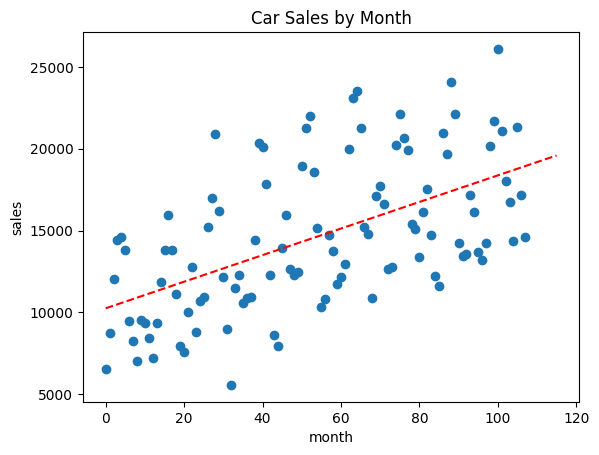

In [70]:
plt.scatter(carsales['period'], carsales['sales'])
plt.plot(x_extended, extended_prediction, 'r--')
plt.title("Car Sales by Month")
plt.xlabel('month')
plt.ylabel('sales')
plt.show()

## Trying more regression models

### Multivariate Linear Regression to Predict Sales


<center>$car sales = m1 period + m2 period^2 + mr period^3 + b$</center>

In [71]:
carsales['quadratic'] = carsales['period'].apply(lambda x: x**2)
carsales['cubic'] = carsales['period'].apply(lambda x: x**3)

x3 = carsales.loc[:, ['period', 'quadratic', 'cubic']]
print(x3)

     period  quadratic    cubic
0         0          0        0
1         1          1        1
2         2          4        8
3         3          9       27
4         4         16       64
..      ...        ...      ...
103     103      10609  1092727
104     104      10816  1124864
105     105      11025  1157625
106     106      11236  1191016
107     107      11449  1225043

[108 rows x 3 columns]


In [72]:
x3 = carsales.loc[:, ['period', 'quadratic', 'cubic']].values.reshape(-1,3)
print(x3)

[[      0       0       0]
 [      1       1       1]
 [      2       4       8]
 [      3       9      27]
 [      4      16      64]
 [      5      25     125]
 [      6      36     216]
 [      7      49     343]
 [      8      64     512]
 [      9      81     729]
 [     10     100    1000]
 [     11     121    1331]
 [     12     144    1728]
 [     13     169    2197]
 [     14     196    2744]
 [     15     225    3375]
 [     16     256    4096]
 [     17     289    4913]
 [     18     324    5832]
 [     19     361    6859]
 [     20     400    8000]
 [     21     441    9261]
 [     22     484   10648]
 [     23     529   12167]
 [     24     576   13824]
 [     25     625   15625]
 [     26     676   17576]
 [     27     729   19683]
 [     28     784   21952]
 [     29     841   24389]
 [     30     900   27000]
 [     31     961   29791]
 [     32    1024   32768]
 [     33    1089   35937]
 [     34    1156   39304]
 [     35    1225   42875]
 [     36    1296   46656]
 

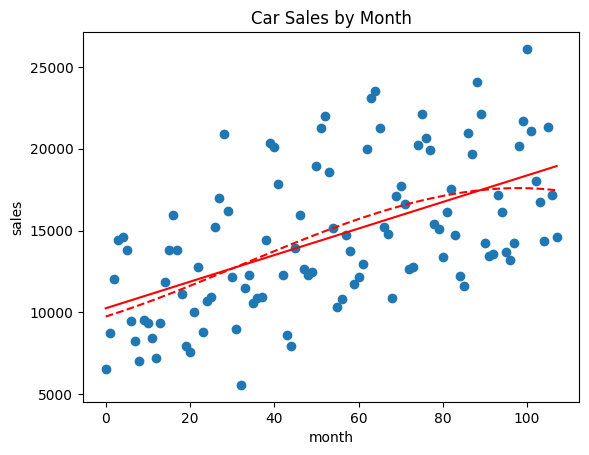

In [73]:
x3 = carsales.loc[:,['period', 'quadratic', 'cubic']].values.reshape(-1,3)
y = carsales['sales'].values.reshape(-1,1)

regressor_cubic = LinearRegression()
regressor_cubic.fit(x3, y)

plt.scatter(carsales['period'], carsales['sales'])
plt.plot(x, regressor.predict(x), 'r-')
plt.plot(x, regressor_cubic.predict(x3), 'r--')

plt.title('Car Sales by Month')
plt.xlabel('month')
plt.ylabel('sales')
plt.show()

In [74]:
print(regressor_cubic.coef_)
print(regressor_cubic.intercept_)

[[ 8.13410634e+01  7.90279561e-01 -8.19451188e-03]]
[9746.41276055]


<center>$car sales = 81.34period + 0.79period^2 - 0.008 period^3 + 9746.41$</center>

## Trigonometry to Capture Variations

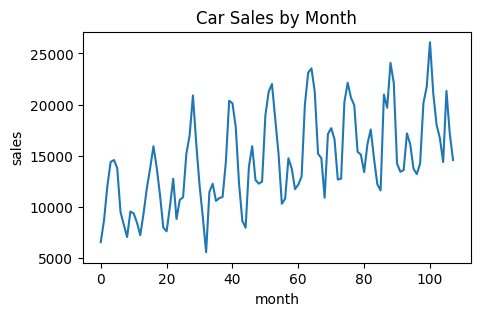

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.plot(carsales['period'], carsales['sales'])
plt.title('Car Sales by Month')
plt.xlabel('month')
plt.ylabel('sales')
plt.show()

In particular, our data includes nine years of sales figures, and exactly nine
major peaks are apparent in the contour of the line plot. What looked like totally random noise actually has some structure: a predictable peak in sales occurs every summer, with a corresponding trough every winter.

If you think about it a little more, you might realize why variation could exist within a year: it’s because this data comes from Quebec, where very cold winters are associated with lower activity levels, and beautiful warm summers are associated with going outside and shopping and taking long road trips that require cars.

Now that you can see the way the number of car sales goes up and down
during a year, maybe it reminds you of a mathematical function. In fact, the
pattern of periodic increases and decreases looks like a trigonometric curve, like a sine or cosine curve.

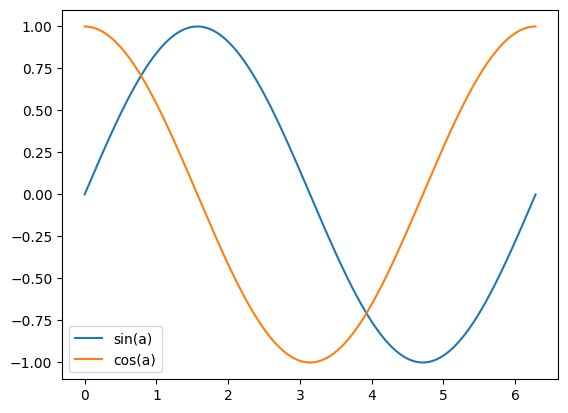

In [76]:
import numpy as np
a = np.linspace(0, 2*np.pi, 1000)

plt.plot(a, np.sin(a), label="sin(a)")
plt.plot(a, np.cos(a), label="cos(a)")

plt.legend()
plt.show()

## A Regression that uses the sine and cosine of the period in a multivariate regression:

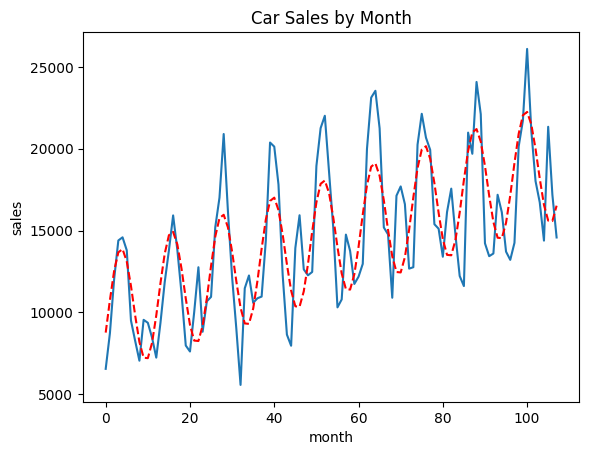

In [77]:
import math

carsales['sin_period'] = carsales['period'].apply(lambda x: math.sin(x*2*math.pi/12))
carsales['cos_period'] = carsales['period'].apply(lambda x: math.cos(x*2*math.pi/12))

x_trig = carsales.loc[:, ['period', 'sin_period', 'cos_period']].values.reshape(-1,3)
y = carsales['sales'].values.reshape(-1,1)
# print(x_trig)

regressor_trig = LinearRegression()
regressor_trig.fit(x_trig, y)

plt.plot(carsales['period'], carsales['sales'])
plt.plot(x, regressor_trig.predict(x_trig), 'r--')
plt.title('Car Sales by Month')
plt.xlabel('month')
plt.ylabel('sales')
plt.show()

We can verify that this trigonometric curve has a lower RMSE than the straight line as follows:

In [78]:
trig_line = regressor_trig.predict(x_trig)[:, 0]
print(get_rmse(trig_line, saleslist))

2680.5520744410464


## Choosing the Best Regression to Use for Forecasting

Whenever we find a model with a lower RMSE, we are getting a model that fits our data better. The natural temptation is to keep looking for new regression specifications that have lower and lower RMSEs.

For example, let’s try a new regression specification that includes seven prediction terms to forecast sales, and find the RMSE for that model:

In [79]:
carsales['squareroot'] = carsales['period'].apply(lambda x: x**0.5)
carsales['exponent15'] = carsales['period'].apply(lambda x: x**1.5)
carsales['log'] = carsales['period'].apply(lambda x: math.log(x+1))

x_complex = carsales.loc[:, ['period', 'log', 'sin_period', 'cos_period', \
                             'squareroot', 'exponent15', 'log', 'quadratic', 'cubic']].values.reshape(-1, 9)
y = carsales['sales'].values.reshape(-1,1)

regressor_complex =  LinearRegression()
regressor_complex.fit(x_complex, y)

complex_line = [prediction for sublist in regressor_complex.predict(x_complex) \
                for prediction in sublist]
print(get_rmse(complex_line, saleslist))

2610.3938122978843


## Test Sets

Let’s look at the code to accomplish this training/test split, and then we’ll see what makes it work so well:

In [80]:
x_complex_train = carsales.loc[0:80, ['period', 'log', 'sin_period', 'cos_period', \
                            'squareroot', 'exponent15', 'log', 'quadratic', 'cubic']].values.reshape(-1,9)
y_train = carsales.loc[0:80, 'sales'].values.reshape(-1,1)

x_complex_test = carsales.loc[81:107, ['period', 'log', 'sin_period', 'cos_period', \
                            'squareroot', 'exponent15', 'log', 'quadratic', 'cubic']].values.reshape(-1,9)

y_test = carsales.loc[81:107, 'sales'].values.reshape(-1,1)

regressor_complex.fit(x_complex_train, y_train)


LinearRegression()

Here, we split the data into two sets: a training set and a test set. We use the
training set to train the data (to fit a regression line). We can then use the test set to test how well our regression performs.

After we’ve created training and test sets, we can test our different regression
models on the test set and check the RMSE or the MAE for each model. The
model that has the lowest RMSE or MAE on the test set is a reasonable choice
for the model we can use for forecasts of the actual future. Let’s check the
RMSE for several of the regressions we’ve run so far:


In [81]:
x_train = carsales.loc[0:80, 'period'].values.reshape(-1,1)
x_test = carsales.loc[81:107, 'period'].values.reshape(-1,1)
x_trig_train = carsales.loc[0:80, ['period', 'sin_period', 'cos_period']].values.reshape(-1,3)
x_trig_test = carsales.loc[81:107, ['period', 'sin_period', 'cos_period']].values.reshape(-1,3)
# x_complex_train = look at code above
# x_complex_test = look at code above

y_train = carsales.loc[0:80, 'sales'].values.reshape(-1,1)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

regressor_trig = LinearRegression()
regressor_trig.fit(x_trig_train, y_train)

regressor_complex = LinearRegression()
regressor_complex.fit(x_complex_train, y_train)

test_predictions = [prediction for sublist in regressor.predict(x_test) for prediction in sublist]
trig_test_predictions = [prediction for sublist in regressor_trig.predict(x_trig_test) for prediction in sublist]
complex_test_predictions = [prediction for sublist in regressor_complex.predict(x_complex_test) for prediction in sublist]

print(get_rmse(test_predictions, saleslist[81:107]))
print(get_rmse(trig_test_predictions, saleslist[81:107]))
print(get_rmse(complex_test_predictions, saleslist[81:107]))

4115.614379193304
3461.0823292599357
6006.013164062921


After you run the preceding snippet, you can see that our univariate regression
has an RMSE of about 4,116 on the test set. The trigonometric multivariate
regression has an RMSE of about 3,461—much better than the univariate
regression. By contrast, the complex regression model that includes nine
prediction terms has an RMSE of about 6,006 on the test set—an awful
performance. Though it had excellent performance on the training set, we find
that it has awful performance on the test se

This complex model shows a particularly bad example of overfitting. In this
common machine learning problem, a model is too complex and fits the data’s
noise and coincidences instead of the data’s true patterns. Overfitting often
happens when our attempts to get low errors on a training set lead to us getting
much higher errors on a test set.


**Now that we’ve compared models based on their RMSE on the test set, we
can choose the trigonometric model as our best model so far. We can extrapolate
one period forward in this model and determine a forecast for consumer demand
next month, just as we extrapolated for our univariate model before. We can
report this number back to the business as an estimate based on rigorous linear
regression analysis. Not only that, we can explain why we made this prediction
and why we used our model, including the idea of the best-fit line, the
trigonometric modeling of the seasons, and the favorable (low) errors on the test
set. If no objections or countervailing business considerations arise, we can order
this number of cars next month, and we can expect that customers will want to
purchase close to this number of cars.
**

In [82]:
print(regressor_trig.coef_)
print(regressor_trig.intercept_)

[[ 104.39037046 3739.26068266 -922.31361572]]
[9405.05074198]


## Our model to predict demand for the next month

<center> $\Large \text{car sales} = 104.39 \cdot \text{period} + 3739.26 \cdot \sin\left(\frac{2\pi \cdot \text{period}}{12}\right) - 922.31 \cdot \cos\left(\frac{2\pi \cdot \text{period}}{12}\right) + 9405.05$</center>
